In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("kaggle_movie_train.csv")

In [11]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [12]:
df.shape

(22579, 3)

In [13]:
df.head

<bound method NDFrame.head of           id                                               text     genre
0          0  eady dead, maybe even wishing he was. INT. 2ND...  thriller
1          2  t, summa cum laude and all. And I'm about to l...    comedy
2          3   up Come, I have a surprise.... She takes him ...     drama
3          4  ded by the two detectives. INT. JEFF'S APARTME...  thriller
4          5  nd dismounts, just as the other children reach...     drama
...      ...                                                ...       ...
22574  28161  n in the world to decide what I'm going to do ...     drama
22575  28162  shards. BOJO LAZ! Laz pushes Deke back through...     drama
22576  28163  OTTIE You've got a thing about Ernie's, haven'...  thriller
22577  28165  ....with marked skill and dexterity . LANA wry...    action
22578  28166  rd walks off down the hallway, leaving his pos...    comedy

[22579 rows x 3 columns]>

In [14]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

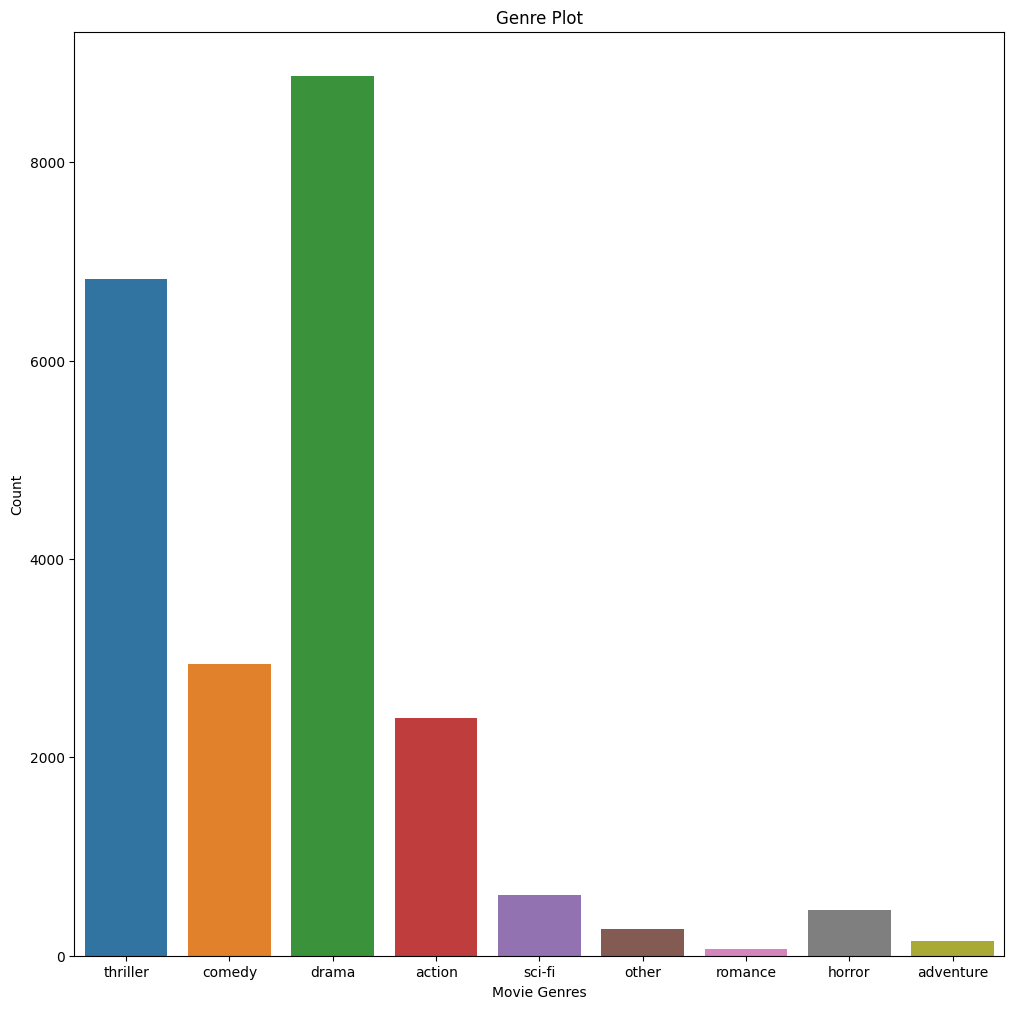

In [15]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

In [16]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [17]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [18]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [19]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [20]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
df.shape

(22579, 2)

In [22]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [23]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [24]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [25]:
len(corpus)

22579

In [26]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

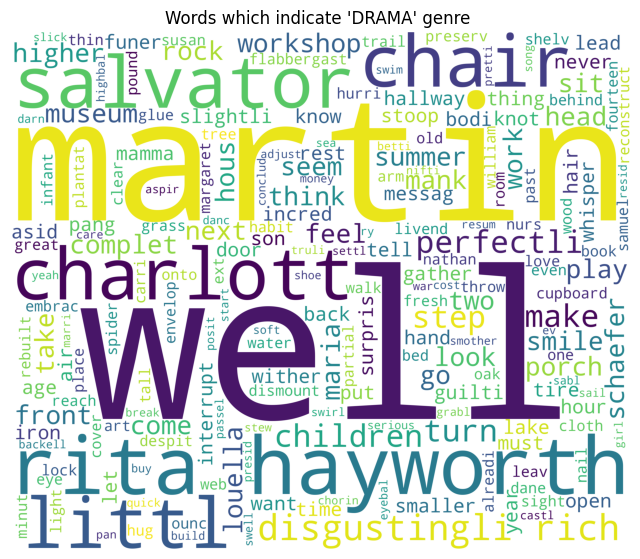

In [27]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

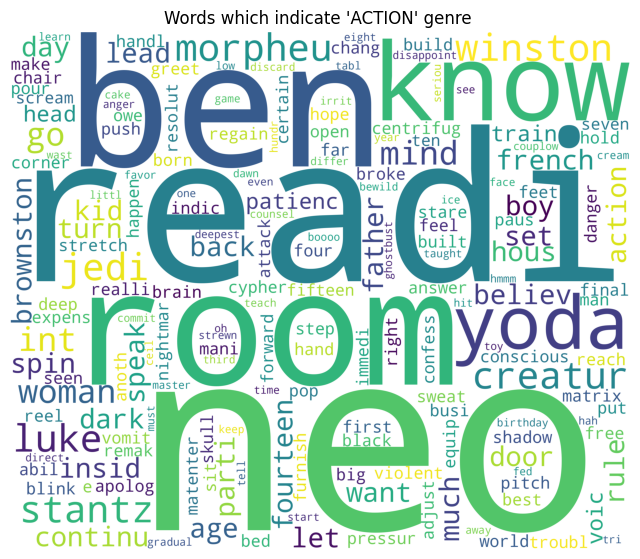

In [28]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

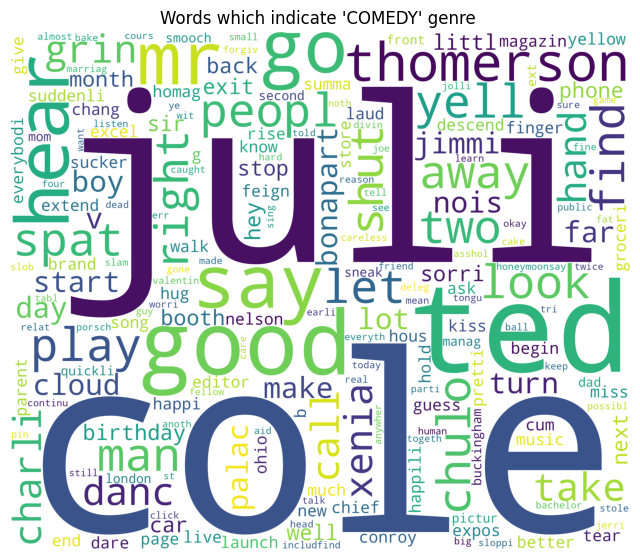

In [29]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [30]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [31]:
y = df['genre'].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


In [33]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [34]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [35]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [37]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

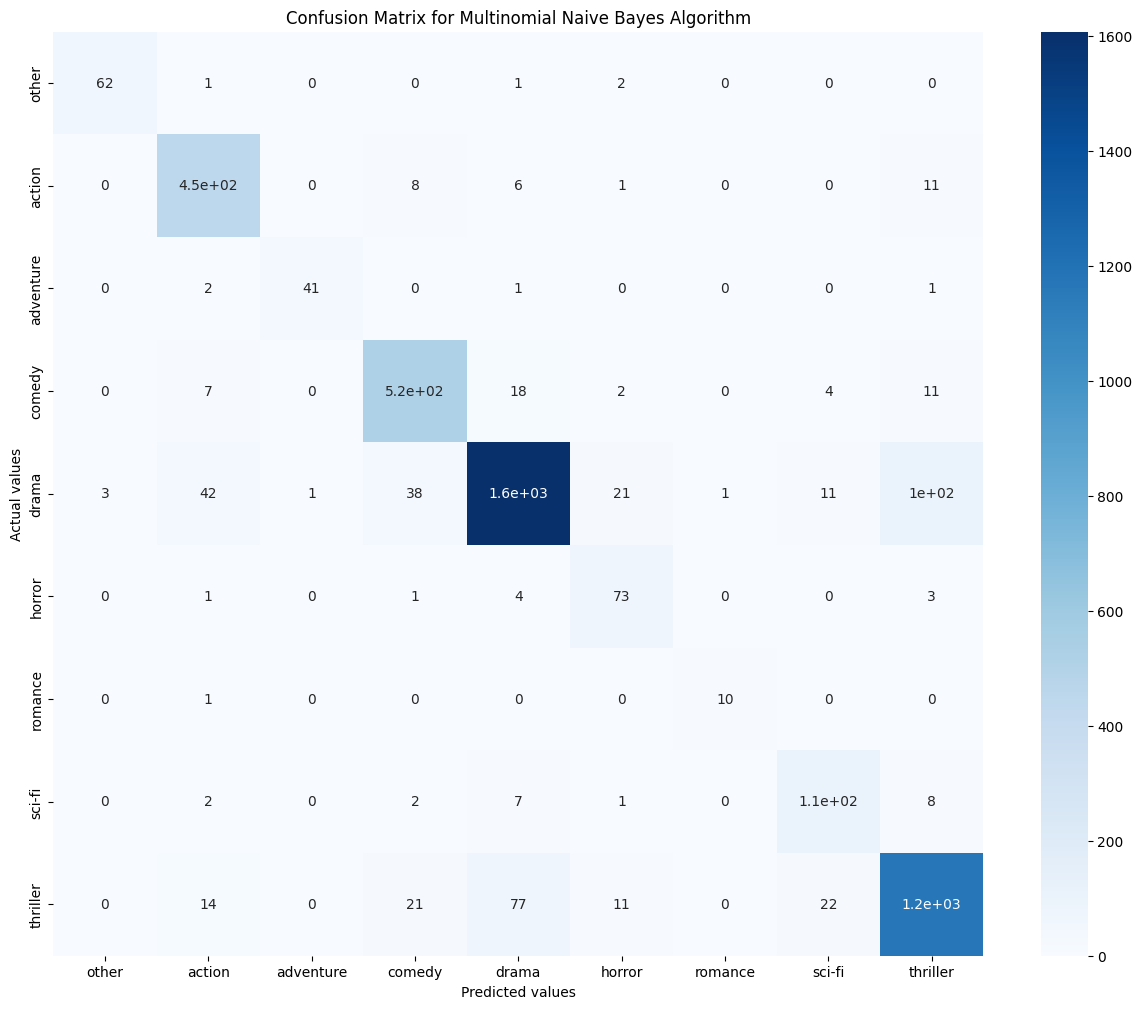

In [38]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()


In [41]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [42]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [43]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [44]:
# For generating random integer
from random import randint

In [46]:
# Loading test dataset
test = pd.read_csv("kaggle_movie_test.csv")
test.columns

Index(['id', 'text'], dtype='object')

In [47]:
test.shape

(5589, 2)

In [48]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [49]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  a child who is also propelled upward by its mother from below is hit, falls, so that he and the child crash into the crowd below. Sepoys firing ad lib. Dyer watching the effect, careful and conscientious. Swift tracking a man running through the staggering crowd, over the litter of bodies, his mouth open, his eyes wild. He arrives at a well, throws down the rope and slides down it. Others seize the idea and in panic throw themselves into the well, dropping out of sight. Featuring Dyer. Meticulously, he taps a corporal on the shoulder with his swagger stick and indicates the well. The corporal signals his line of men. At the well. The gathering crowd men, women and laced with rifle fire. From behind the sepoys we see the whole Bagh, littered with dead and dying, a thick ruck around the well, the walls hanging with wounded and dying, the firing continuing, loud, loud, louder... until CUT TO THE ARMORY HALL THE FORT OF LAHORE INTERIOR DAY Silence. The camera is close as it crosse

In [50]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: el of complexity and detail greater than that of the hieroglyphics themselves. ELLIE breathless Holy shit... These new symbols begin to mutate change... something is happening, Hadden leans in to Ellie. HADDEN You'll like this part. A little flashy... ON SCREEN The symbols metamorphose into strange, fractal shapes like crystals, they begin to grow and shift, interacting in a stunningly beautiful and intricate ballet ELLIE Some kind of circuitry...? HADDEN Very good, Doctor. I've also detected structural elements, back references, a general movement from the simple to the complex all of which would seem to indicate instructions an enormously complicated set of instructions for building something. ELLIE A machine. off Hadden's nod But a machine that does what? HADDEN smiles That would seem to be the question of the hour. turning to her I want to build it, Doctor. Of course I'm already lobbying through the usual channels of influence and corruption but as I said, my colorful past 

In [51]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: rass you. He slowly turns towards her. DULANEY Yes you were. Dulaney stares at her for a moment, then places his briefcase on the table and opens it. INT. RESTAURANT CLOSE ON STRAWBERRIES NIGHT A fork digs into a large strawberry. PULL BACK as we follow the strawberry into Sharon's mouth. Dulaney sits across from Sharon. His eyes are on the strawberries. His mind is someplace else and it isn't hard to guess where. SHARON he said it might be too expensive to add another room. He suggested we might convert the garage into a guest room. He's going to check with the contractor and let me know. I'll let you know how much and we can decide. Alright? 31 Dulaney looks up slowly. It is not so much that he has heard the question it is more that he is aware that Sharon has stopped talking. A beat. Sharon isn't sure he has heard her. SHARON Is that alright, Frank? DULANEY Yeah fine. Excuse me. I'll be right back. He stands and leaves the table. INT. RESTAURANT, HALLWAY NIGHT Dulaney walks 

In [52]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: tands at the back of the room with his friend BILL DOOLER. Dooler, husky, 30, looks like a beatnik on steroids. DOOLER You hear those courtesy laughs, Jerry? There is a seething wrongness at the edges of this party. JERRY Oh come on DOOLER This is fuckin Michael Jordan, man! They should be screaming. JERRY eying crowd You're imagining it. They are joined by unctuous agent Bob Sugar. Sugar is a Maguire wannabee. Puts an arm on Jerry's shoulder. SUGAR We still having lunch tomorrow, Jerry? Looks like Carl Denton tested positive for marijuana. That moves Cush solidly up to numero uno in the draft. DOOLER Oh, that'll really help this party! Let's all talk business! JERRY Dooler, you know Bob Sugar. SUGAR smoothly The best commercial director in the business. I hail you. DOOLER Sorry I yelled. You have exquisite taste. 23. SUGAR Everybody's having a great time. You're both nuts the movie's great. Sugar moves on, cheerfully. DOOLER I like that guy. The movie, which plays simultaneous